In [1]:
pip install scikit-learn numpy matplotlib Pillow

Note: you may need to restart the kernel to use updated packages.


--- Step 1: Image Loaded Successfully ---
Image shape: (427, 640, 3)


--- Step 2: Data Reshaped ---
Reshaped to 273280 pixels, each with 3 color channels.



C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

--- Step 3: K-Means found 16 representative colors ---

--- Step 4: Image Reconstructed Successfully ---

Comparison image saved as 'image_compression_comparison.png'

--- Analysis Complete ---


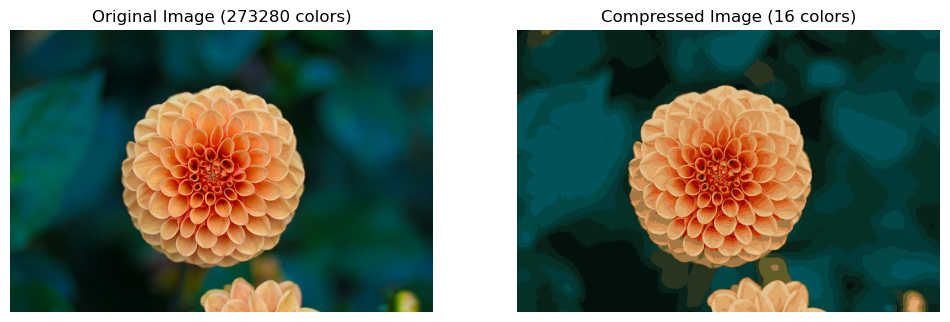

In [2]:
import numpy as np
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

try:
    # --- Step 1: Load the Image ---
    # Load a built-in sample image of a flower.
    # The image is loaded as a NumPy array of shape (height, width, 3).
    flower_image = load_sample_image("flower.jpg")

    # For faster processing, we can resize the image (optional but recommended)
    # from skimage.transform import resize
    # flower_image = (resize(flower_image, (200, 200, 3)) * 255).astype(np.uint8)

    # Normalize the pixel values to be between 0 and 1
    flower_image = flower_image / 255.0
    
    print("--- Step 1: Image Loaded Successfully ---")
    print("Image shape:", flower_image.shape)
    print("\n")

    # --- Step 2: Reshape the Data ---
    # Reshape the image to be a 2D array of pixels (rows) by RGB channels (columns).
    h, w, d = flower_image.shape
    pixels = flower_image.reshape((h * w, d))
    print("--- Step 2: Data Reshaped ---")
    print(f"Reshaped to {pixels.shape[0]} pixels, each with {pixels.shape[1]} color channels.\n")

    # --- Step 3: Apply K-Means ---
    # We want to reduce the image to 16 colors.
    n_colors = 16
    
    # K-Means can be slow on many pixels. We'll fit it on a sample.
    pixels_sample = pixels[np.random.choice(pixels.shape[0], size=5000, replace=False)]
    
    kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=42)
    kmeans.fit(pixels_sample)
    
    # The `cluster_centers_` are our new 16 representative colors.
    new_palette = kmeans.cluster_centers_
    print(f"--- Step 3: K-Means found {n_colors} representative colors ---\n")

    # --- Step 4: Reconstruct the Image ---
    # Use the trained model to assign each original pixel to the nearest color in the palette.
    labels = kmeans.predict(pixels)
    
    # Create the new image by replacing each pixel with its new color.
    reconstructed_pixels = new_palette[labels]
    reconstructed_image = reconstructed_pixels.reshape((h, w, d))
    
    print("--- Step 4: Image Reconstructed Successfully ---")

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(flower_image)
    axes[0].set_title(f'Original Image ({h*w} colors)')
    axes[0].axis('off')

    axes[1].imshow(reconstructed_image)
    axes[1].set_title(f'Compressed Image ({n_colors} colors)')
    axes[1].axis('off')
    
    plt.savefig('image_compression_comparison.png')
    print("\nComparison image saved as 'image_compression_comparison.png'")
    print("\n--- Analysis Complete ---")

except FileNotFoundError:
    print("Could not load sample images. Please ensure scikit-learn is correctly installed.")
except Exception as e:
    print(f"An error occurred: {e}")